# PyTorch. Многослойная полносвязная нейронная сеть

## 1. Подготовка данных

Сгенерируем данные для задачи регрессии с помощью sklearn.

In [153]:
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=1000, n_features=20)
x

array([[ 1.58566381,  0.13679617, -0.12130291, ..., -1.47983337,
        -0.97879488, -0.13045516],
       [-0.25871411, -0.52329327,  0.29355456, ..., -0.3076234 ,
        -2.2109723 , -0.28618499],
       [-0.87118184, -0.70977741,  0.00408873, ..., -0.31430091,
         0.93357282,  0.48459905],
       ...,
       [ 0.44603568, -1.59947135,  0.15157369, ...,  0.76450432,
         1.47170385,  0.41356051],
       [-0.4418636 , -0.33902768,  0.17114625, ..., -0.81186709,
        -1.1128774 ,  0.32181899],
       [ 1.09957482, -1.37694642, -0.40036302, ..., -1.45749198,
        -1.49895286, -0.38958978]])

In [154]:
y

array([ 6.44070943e+01, -2.18583125e+02,  8.34485465e+01, -9.09246431e+01,
        1.59320567e+02, -9.22812558e+01,  1.08347756e+02,  1.40532480e+01,
       -1.84549790e+02, -1.83951188e+02, -4.05904854e+02, -2.47748367e+02,
       -1.15865198e+02,  5.44188366e+01,  2.44465096e+02, -2.34808526e+02,
       -1.56688415e+02,  1.42682681e+01, -1.77326320e+00, -2.29477615e+02,
       -1.34131730e+02, -8.49789864e+01,  1.12893521e+02,  3.57414086e+00,
       -2.05353235e+02, -1.02986043e+02,  2.21437653e+02, -1.03172688e+02,
        3.97501272e+01,  1.88714679e+02, -2.37127351e+02, -1.40501413e+02,
       -3.22564809e+01,  2.45432001e+02, -5.17064789e+01,  1.59937496e+02,
        1.61111314e+02,  9.82969089e+01, -3.17718282e+01, -7.51986145e+00,
       -1.79289275e+02, -1.39256524e+02,  1.15601561e+02,  1.52130351e+02,
        1.90270750e+02,  5.48366550e+01,  1.58612796e+02,  6.30745542e+00,
       -1.54286787e+02,  1.58157165e+02,  1.21644499e+01, -2.58598864e+01,
       -1.71798363e+02,  

In [155]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [156]:
import torch
from torch import nn, optim

Преобразуем данные в тензоры.

In [157]:
x_train_tensor = torch.from_numpy(x_train)
y_train_tensor = torch.from_numpy(y_train).unsqueeze(1)

x_test_tensor = torch.from_numpy(x_test)
y_test_tensor = torch.from_numpy(y_test).unsqueeze(1)

In [158]:
x_train_tensor

tensor([[ 0.1839, -1.7550, -0.1078,  ..., -0.1852, -2.3667, -0.2892],
        [-1.6231, -0.0797,  0.9829,  ..., -0.9582,  0.7297, -1.3595],
        [-1.8505, -1.0486,  1.1526,  ..., -0.3968,  0.6997, -1.2679],
        ...,
        [-0.3746,  0.7550,  1.6997,  ...,  0.6201,  0.8879, -0.5140],
        [ 1.0272, -0.1501,  1.1978,  ...,  1.5899,  0.3420, -1.8219],
        [-1.5857, -0.4302, -0.4169,  ..., -1.1136,  0.8261, -0.0569]],
       dtype=torch.float64)

In [159]:
y_train_tensor

tensor([[-2.8871e+01],
        [ 2.7375e+01],
        [ 1.2061e+02],
        [-2.2966e+01],
        [ 1.6642e+02],
        [-1.3697e+02],
        [-2.7199e+02],
        [-1.7704e+02],
        [-8.1601e+01],
        [ 9.3466e+00],
        [ 1.8245e+02],
        [-5.9870e+01],
        [ 1.1979e+02],
        [ 2.1370e+02],
        [ 6.2613e+01],
        [ 6.9436e+01],
        [-2.6292e+02],
        [ 1.0324e+02],
        [ 1.9546e+02],
        [ 3.9688e+01],
        [ 9.4439e+01],
        [ 7.6175e+01],
        [ 1.2503e+02],
        [ 7.0933e+01],
        [ 2.4591e+02],
        [-9.3917e+01],
        [-1.8492e+01],
        [-1.6184e+02],
        [ 1.3282e+02],
        [ 3.2513e+02],
        [-1.2940e+02],
        [-2.5861e+02],
        [ 4.8915e+01],
        [ 2.1053e+02],
        [ 1.7472e+02],
        [-3.4891e+01],
        [-2.2774e+02],
        [-6.7440e+01],
        [ 9.5649e+00],
        [-4.0590e+02],
        [ 4.8796e+01],
        [-3.0707e+01],
        [ 2.8931e+02],
        [ 8

## 2. Обучение нейронной сети

Создадим многослойную полносвязную нейронную сеть.

In [160]:
x_train_tensor.shape[1]

20

In [161]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_layers, output_layers):
        super(NeuralNetwork, self).__init__()
        self.sequential = nn.Sequential(
                nn.Linear(input_layers, 10, bias=True),
                nn.Linear(10, 4, bias=True),
                nn.Linear(4, output_layers, bias=True)
            ).to(torch.double)

    def forward(self, x):
        return self.sequential(x)

In [162]:
def create_neural_network():
    return NeuralNetwork(x_train_tensor.shape[1], 1)

Подготовим метод для обучения модели.

В качестве метрики будем использовать MSE, для обучения модели будем использовать стохастический градиентный спуск с уменьшением шага на плато.

In [163]:
loss_fn = nn.MSELoss(reduction='sum')

def train(x, y, n_epochs, learning_rate):
    neural_network = create_neural_network()

    optimizer = optim.SGD(neural_network.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)

    for epoch in range(n_epochs):
        neural_network.train()

        prediction = neural_network(x)
        loss = loss_fn(y, prediction)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        scheduler.step(loss)

        if (epoch % 20) == 0: # выводим информацию об ошибке
            print(f'epoch: {epoch}, loss: {loss:.5f}')
    
    return neural_network

In [164]:
def predict(neural_network, data):
    with torch.no_grad():
        neural_network.eval()
        prediction = neural_network(data)
        return prediction

Обучим модель.

In [165]:
trained_model = train(x_train_tensor, y_train_tensor, n_epochs=1000, learning_rate=0.000001)
trained_model

epoch: 0, loss: 21028772.19018
epoch: 20, loss: 20956397.92176
epoch: 40, loss: 20919733.68414
epoch: 60, loss: 20900069.02810
epoch: 80, loss: 20877186.90163
epoch: 100, loss: 20850277.13215
epoch: 120, loss: 20818292.47329
epoch: 140, loss: 20779861.80679
epoch: 160, loss: 20733166.05720
epoch: 180, loss: 20675758.07480
epoch: 200, loss: 20604296.98025
epoch: 220, loss: 20514149.78388
epoch: 240, loss: 20398783.67245
epoch: 260, loss: 20248822.96324
epoch: 280, loss: 20050561.70634
epoch: 300, loss: 19783585.46613
epoch: 320, loss: 19416939.80903
epoch: 340, loss: 18902993.10377
epoch: 360, loss: 18167957.14256
epoch: 380, loss: 17098859.85615
epoch: 400, loss: 15532026.43235
epoch: 420, loss: 13267676.65421
epoch: 440, loss: 10182780.46311
epoch: 460, loss: 6533905.35538
epoch: 480, loss: 3214287.05823
epoch: 500, loss: 1152644.24837
epoch: 520, loss: 313254.21675
epoch: 540, loss: 72117.46784
epoch: 560, loss: 16129.39954
epoch: 580, loss: 4098.32608
epoch: 600, loss: 1362.24756
ep

NeuralNetwork(
  (sequential): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=4, bias=True)
    (2): Linear(in_features=4, out_features=1, bias=True)
  )
)

Вычислим прогнозы на обучающей и тестовой выборках.

In [166]:
prediction_train = predict(trained_model, x_train_tensor)
prediction_test = predict(trained_model, x_test_tensor)
prediction_test

tensor([[-166.4748],
        [  97.5447],
        [-182.7942],
        [ 125.4952],
        [-102.8881],
        [-229.2314],
        [ 210.5365],
        [ -98.4134],
        [-308.9392],
        [ -53.4521],
        [-174.3149],
        [-247.7504],
        [-174.3577],
        [  41.8006],
        [ 152.7625],
        [  64.3929],
        [  55.4263],
        [ -67.0964],
        [ -29.6700],
        [ -37.6358],
        [ 229.6134],
        [ 111.0829],
        [  80.6839],
        [ 161.1083],
        [ -65.4367],
        [  76.0260],
        [ -78.3397],
        [ -80.3115],
        [-116.2745],
        [ 109.2066],
        [-278.6653],
        [ 121.4041],
        [ 162.9839],
        [ 190.1936],
        [-107.9092],
        [  81.5902],
        [ 170.9145],
        [ -83.0135],
        [ 140.9837],
        [  91.4166],
        [ -49.4360],
        [  -1.7797],
        [ 130.3745],
        [  23.9568],
        [ 258.8134],
        [ -10.3006],
        [ 244.3544],
        [-211

Вычислим MSE на обучающей и тестовой выборках.

Значение ошибки очень мало, это значит, что модель очень успешно обучилась.

In [167]:
loss_fn(y_train_tensor, prediction_train)

tensor(0.0363, dtype=torch.float64)

In [168]:
loss_fn(y_test_tensor, prediction_test)

tensor(0.0109, dtype=torch.float64)

Видно, что качество модели получилось очень высоким, для всех точек значения прогноза практически равны истинным значениям.

Text(0, 0.5, 'Предсказанная целевая переменная')

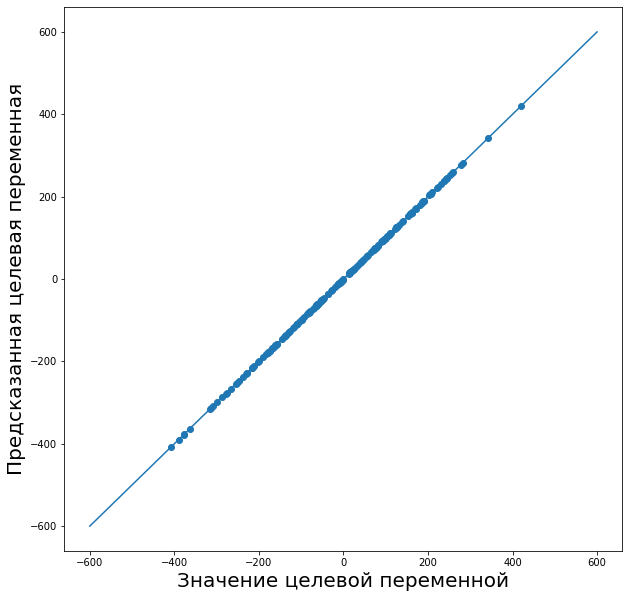

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(y_test_tensor, prediction_test)
plt.plot([-600, 600], [-600, 600])
plt.xlabel('Значение целевой переменной', fontsize=20)
plt.ylabel('Предсказанная целевая переменная', fontsize=20)